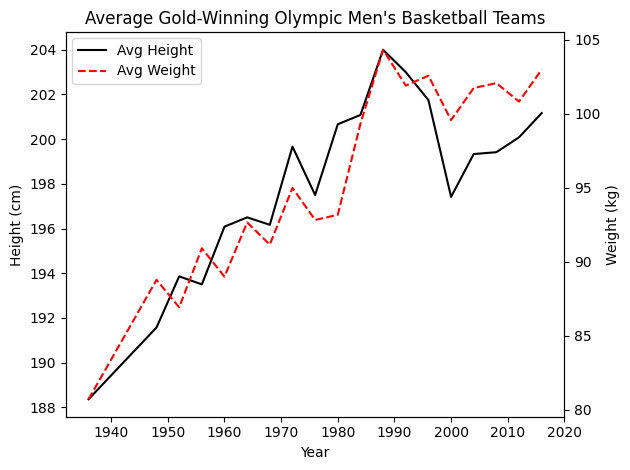

In [ ]:
########### Question 1 #############

import pandas as pd
import matplotlib.pyplot as plt

#loading the csv file
df = pd.read_csv('olympic_athletes.csv')

#filtering for the event
df_basketball = df[(df['Event'] == "Basketball Men's Basketball") & (df['Medal'] == 'Gold')]

#grouping by year and then calculating the average of both height and weight
average_hw = df_basketball.groupby('Year').agg({'Height': 'mean', 'Weight': 'mean'}).reset_index()

#plot
fig, ax1 = plt.subplots()

#y axis
ax1.set_xlabel('Year')
ax1.set_ylabel('Height (cm)', color='black')
line1, = ax1.plot(average_hw['Year'], average_hw['Height'], color='black', linestyle='-', label='Avg Height')
ax1.tick_params(axis='y', labelcolor='black')
ax1.set_yticks(range(188, 205, 2))

ax2 = ax1.twinx()
ax2.set_ylabel('Weight (kg)', color='black')
line2, = ax2.plot(average_hw['Year'], average_hw['Weight'], color='red', linestyle='--', label='Avg Weight')
ax2.tick_params(axis='y', labelcolor='black')
ax2.set_yticks(range(80, 110, 5))

#title and grid
plt.title("Average Gold-Winning Olympic Men's Basketball Teams")
fig.tight_layout()
plt.grid(False)
fig.legend(handles=[line1, line2], loc='upper left', bbox_to_anchor=(0.11, 0.925))

plt.show()

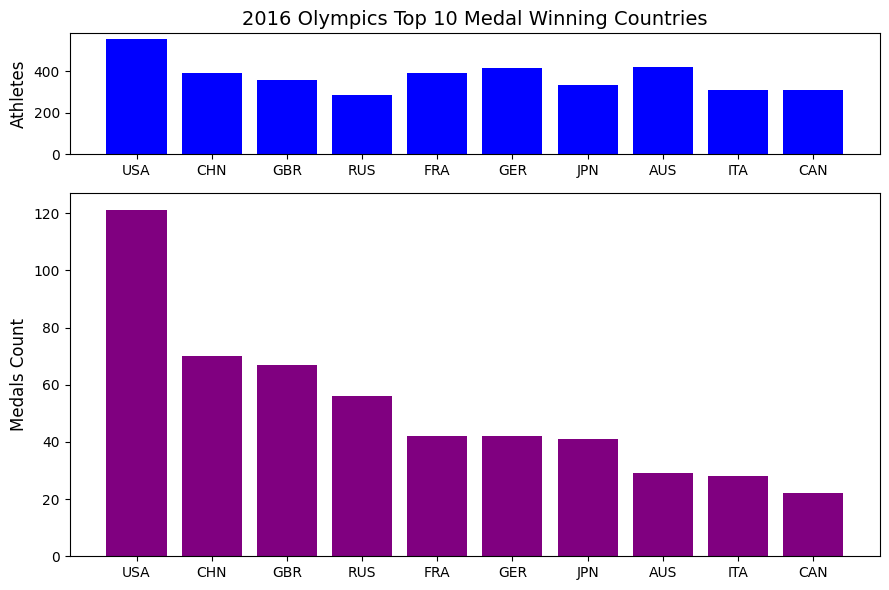

In [ ]:
########### Question 2 ###########


import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import gridspec

#loading the csv file
df = pd.read_csv('olympic_athletes.csv')

#filtering for 2016 summer
df_2016 = df[df['Games'] == "2016 Summer"]

#counting each athlete only once
df_2016_unique_athletes = df_2016.drop_duplicates(subset=['NOC', 'ID'])

#counting unique athlete per country
athletes_per_country = df_2016_unique_athletes['NOC'].value_counts().reset_index(name='Athletes')
athletes_per_country.columns = ['NOC', 'Athletes']

#counting medal once when medal=event=sport=noc
df_unique_medals = df_2016.drop_duplicates(subset=['NOC', 'Sport', 'Event', 'Medal'])

#grouping medal for each country
medals_per_country = df_unique_medals.groupby(['NOC', 'Medal']).size().unstack(fill_value=0)

#total medals per country
medals_per_country['Total'] = medals_per_country.sum(axis=1)

#sorting
top_countries = medals_per_country.sort_values(by='Total', ascending=False).head(10)

#copying the sorting from the second plot
df_sorted_nocs = medals_per_country.sort_values(by='Total', ascending=False).head(10).index

#using the sorting for the first plot
athletes_per_country_sorted = athletes_per_country[athletes_per_country['NOC'].isin(df_sorted_nocs)]
athletes_per_country_sorted = athletes_per_country_sorted.set_index('NOC').loc[df_sorted_nocs].reset_index()

#creating figuring, using gridspec for size ratio
fig = plt.figure(figsize=(9, 6))
gs = gridspec.GridSpec(nrows=2, ncols=1, height_ratios=[1, 3])

#top plot
ax1 = fig.add_subplot(gs[0])
ax1.bar(athletes_per_country_sorted['NOC'], athletes_per_country_sorted['Athletes'], color='blue')
ax1.set_title('2016 Olympics Top 10 Medal Winning Countries', fontsize=14)
ax1.set_ylabel('Athletes', fontsize=12)
ax1.set_yticks(range(0, 401, 200))

#bottom plot
ax2 = fig.add_subplot(gs[1])
ax2.bar(top_countries.index, top_countries['Total'], color='purple')
ax2.set_ylabel('Medals Count', fontsize=12)
ax2.set_yticks(range(0, 121, 20))

plt.tight_layout()
plt.show()

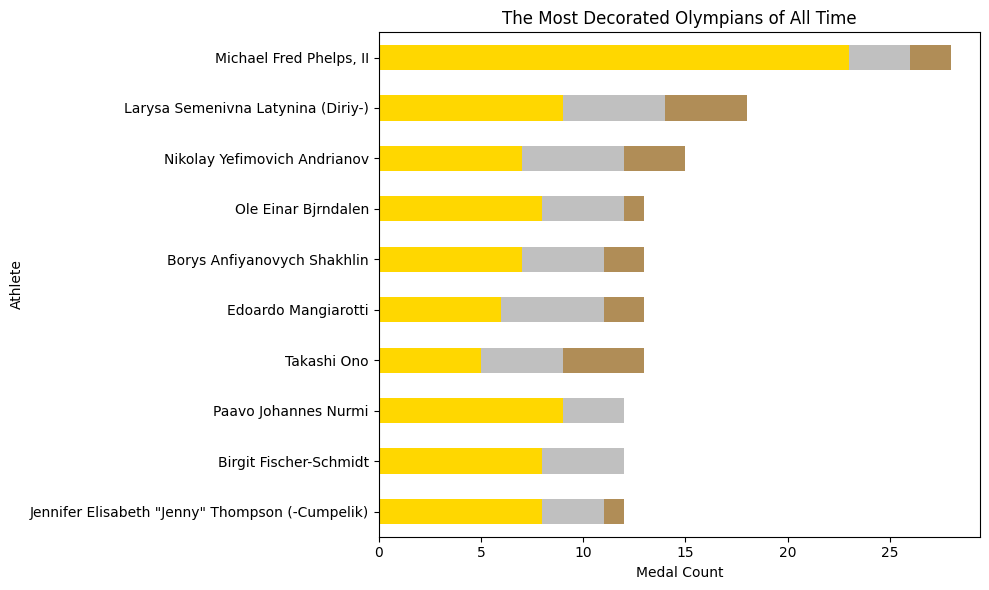

In [ ]:
########### Question 3 #############


import pandas as pd
import matplotlib.pyplot as plt

#loading the csv file
df = pd.read_csv('olympic_athletes.csv')

#grouping and couting the medals
athlete_medals = df.groupby('Name')['Medal'].value_counts().unstack(fill_value=0)

#total medal column
athlete_medals['Total'] = athlete_medals.sum(axis=1)

#sorting, once for top 10 and then changing it to descending order
top_athletes = athlete_medals.sort_values(by=['Total', 'Gold','Silver', 'Bronze'], ascending=[False, False, False, False]).head(10)
top_athletes_ordered = top_athletes.sort_values(by =['Total', 'Gold', 'Silver', 'Bronze'], ascending = True)

#plot
fig, ax = plt.subplots(figsize=(10, 6))

#separating gold, silver, bronze in the bar by colour
top_athletes_ordered[['Gold', 'Silver', 'Bronze']].plot(kind='barh', stacked=True, ax=ax, color=['#FFD700', '#C0C0C0', '#B08D57'], legend=False)

#labels
ax.set_xlabel('Medal Count')
ax.set_ylabel('Athlete')
ax.set_title('The Most Decorated Olympians of All Time')

plt.tight_layout()
plt.show()

In [ ]:
#Attributes
#Chat gpt for gridspace idea to match the ratio